In [68]:
# 读取数据

import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
data_1= pd.read_csv("E:\Pycharm\Intrusion_Detection\kddcup.data_10_percent.csv",  header=None,names = col_names)
#去重
# data_1=data.drop_duplicates()

In [69]:
y_1=data_1['label'].copy()   #一维
##y的处理
u2r=["buffer_overflow.","loadmodule.","perl.","rootkit."]
r2l=["ftp_write.","imap.","guess_passwd.","phf.","spy.","multihop.","warezmaster.","warezclient."]
dos=["back.","land.","pod.","smurf.","teardrop.",'neptune.']
probe=["satan.","portsweep.","ipsweep.","nmap."]
for i in u2r:
    y_1[y_1==i]="u2r"
for i in r2l:
    y_1[y_1==i]="r2l"
for i in dos:
    y_1[y_1==i]="dos"
for i in probe:
    y_1[y_1==i]="probe"
y_1[y_1=="normal."]="normal"

In [70]:
#one-hot
dummies_protocol = pd.get_dummies(data_1["protocol_type"], prefix='protocol')
dummies_flag = pd.get_dummies(data_1["flag"], prefix='flag')

data_2 = pd.concat([data_1, dummies_protocol,dummies_flag], axis=1)

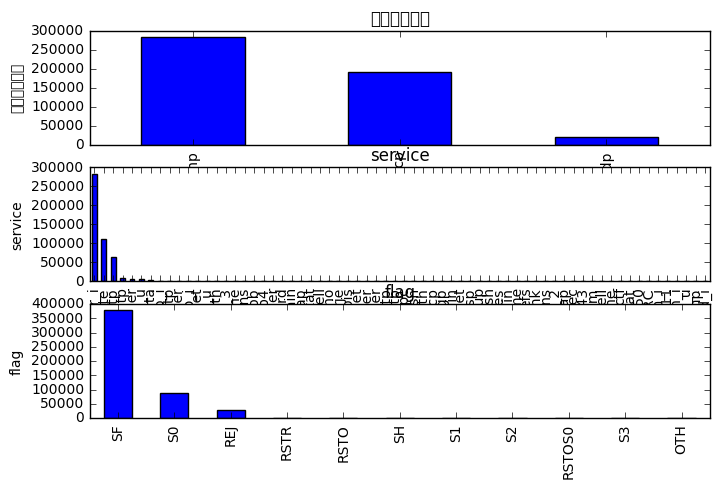

In [71]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[8,5])

plt.subplot2grid((3,1),(0,0)) 
data.protocol_type.value_counts().plot(kind="bar")
plt.ylabel("协议数量分布")
plt.title(u'协议类型分布')

plt.subplot2grid((3,1),(1,0)) 

data.service.value_counts().plot(kind="bar")
plt.ylabel('service')
plt.title('service')

plt.subplot2grid((3,1),(2,0))
data.flag.value_counts().plot(kind="bar")
plt.ylabel('flag')
plt.title('flag')

plt.show()

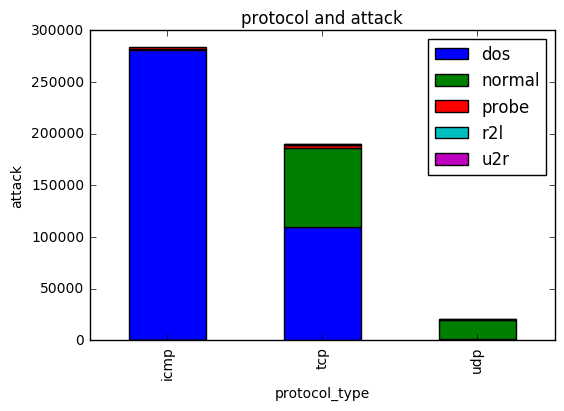

In [41]:
#查看协议类型与攻击类型的关系
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

nor = data_1.protocol_type[y_1 == "normal"].value_counts()
dos = data_1.protocol_type[y_1 == "dos"].value_counts()
pro = data_1.protocol_type[y_1 == "probe"].value_counts()
u2r = data_1.protocol_type[y_1 == "u2r"].value_counts()
r2l = data_1.protocol_type[y_1 == "r2l"].value_counts()
df=pd.DataFrame({'normal':nor, 'dos':dos,'probe':pro,'u2r':u2r,'r2l':r2l})
df.plot(kind='bar', stacked=True)
plt.title("protocol and attack")
plt.xlabel("protocol_type") 
plt.ylabel("attack") 

plt.show()

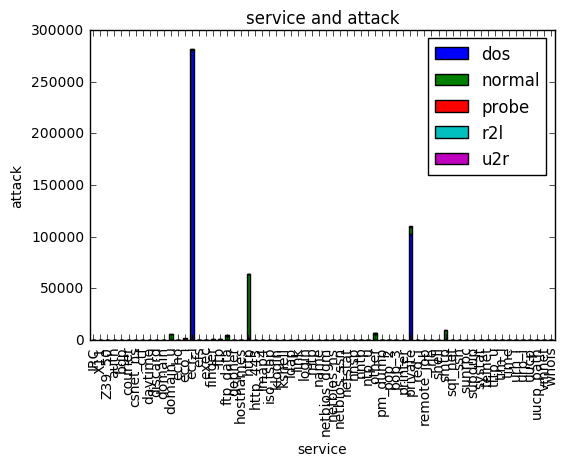

In [43]:
#查看service类型与攻击类型的关系
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[15,5])
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

nor = data_1.service[y_1 == "normal"].value_counts()
dos = data_1.service[y_1 == "dos"].value_counts()
pro = data_1.service[y_1 == "probe"].value_counts()
u2r = data_1.service[y_1 == "u2r"].value_counts()
r2l = data_1.service[y_1 == "r2l"].value_counts()
df=pd.DataFrame({'normal':nor, 'dos':dos,'probe':pro,'u2r':u2r,'r2l':r2l})
df.plot(kind='bar', stacked=True)
plt.title("service and attack")
plt.xlabel("service") 
plt.ylabel("attack") 

plt.show()

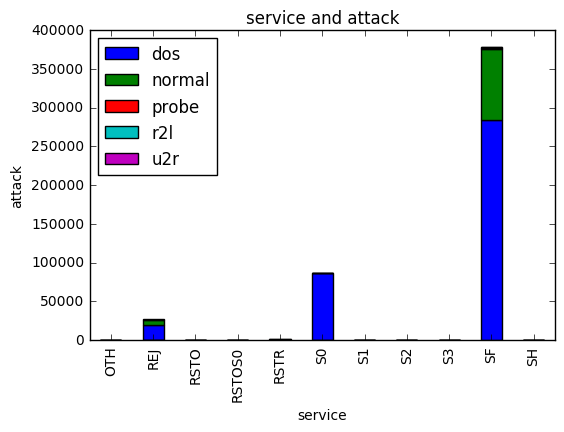

In [44]:
#查看flag类型与攻击类型的关系
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[15,5])
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

nor = data_1.flag[y_1 == "normal"].value_counts()
dos = data_1.flag[y_1 == "dos"].value_counts()
pro = data_1.flag[y_1 == "probe"].value_counts()
u2r = data_1.flag[y_1 == "u2r"].value_counts()
r2l = data_1.flag[y_1 == "r2l"].value_counts()
df=pd.DataFrame({'normal':nor, 'dos':dos,'probe':pro,'u2r':u2r,'r2l':r2l})
df.plot(kind='bar', stacked=True)
plt.title("service and attack")
plt.xlabel("service") 
plt.ylabel("attack") 

plt.show()

In [147]:
#建立X,y
feature=["duration","src_bytes",
    "dst_bytes","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_access_files","num_outbound_cmds",
    "is_guest_login","rerror_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","protocol_icmp","protocol_tcp","protocol_udp",
    "flag_OTH","flag_REJ","flag_RSTO","flag_RSTOS0","flag_RSTR","flag_S0","flag_S1","flag_S2","flag_S3","flag_SF","flag_SH"]
   
X_1=data_2[feature]

In [148]:
#标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_1)
X=scaler.transform(X_1)  #X是ndarray

In [149]:
X_1=pd.DataFrame(X,columns=feature)
X_1.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.067792,-0.002879,0.138664,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,...,-0.239855,-0.034255,-0.004719,-0.042793,-0.462352,-0.010742,-0.00697,-0.004499,0.552643,-0.014719
1,-0.067792,-0.002820,-0.011578,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,...,-0.239855,-0.034255,-0.004719,-0.042793,-0.462352,-0.010742,-0.00697,-0.004499,0.552643,-0.014719
2,-0.067792,-0.002824,0.014179,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,...,-0.239855,-0.034255,-0.004719,-0.042793,-0.462352,-0.010742,-0.00697,-0.004499,0.552643,-0.014719
3,-0.067792,-0.002840,0.014179,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,...,-0.239855,-0.034255,-0.004719,-0.042793,-0.462352,-0.010742,-0.00697,-0.004499,0.552643,-0.014719
4,-0.067792,-0.002842,0.035214,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,-0.010552,...,-0.239855,-0.034255,-0.004719,-0.042793,-0.462352,-0.010742,-0.00697,-0.004499,0.552643,-0.014719


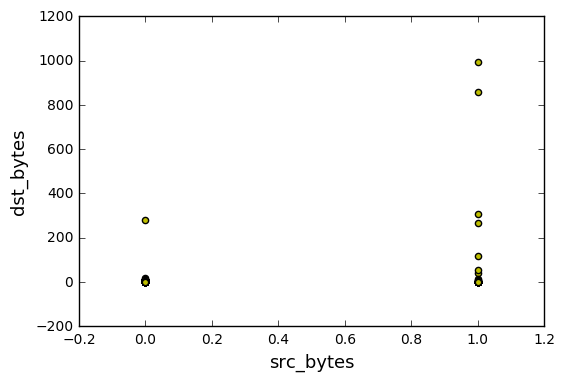

In [142]:
plt.scatter(data_1.root_shell, data_1.num_root, c='y')
# plt.title("Point Guards")
plt.xlabel('src_bytes', fontsize=13)
plt.ylabel('dst_bytes', fontsize=13)
plt.show()

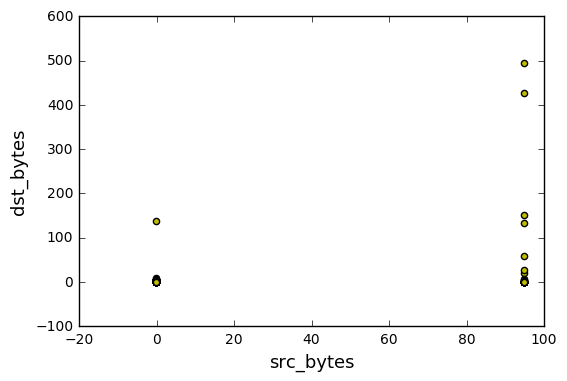

In [150]:
plt.scatter(X_1.root_shell, X_1.num_root, c='y')
# plt.title("Point Guards")
plt.xlabel('src_bytes', fontsize=13)
plt.ylabel('dst_bytes', fontsize=13)
plt.show()

In [152]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['root_shell'], clustered_df['num_root'], c=colors[n-1])
        plt.xlabel('src_bytes', fontsize=13)
        plt.ylabel('dst_bytes', fontsize=13)
    plt.show()

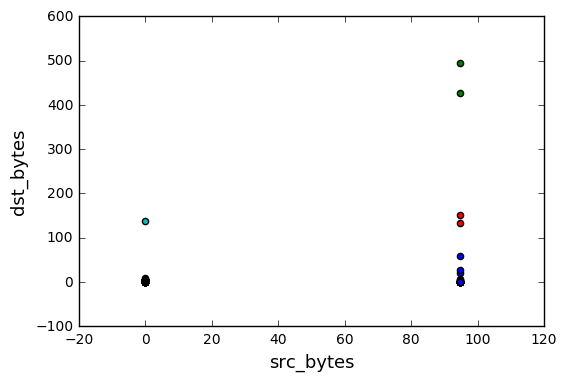

In [153]:
#K-means 对"src_bytes","dst_bytes"聚类（二者对u2r类型更有贡献）
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(X_1[['root_shell', 'num_root']])
X_1['cluster'] = kmeans.labels_

visualize_clusters(X_1, 5)

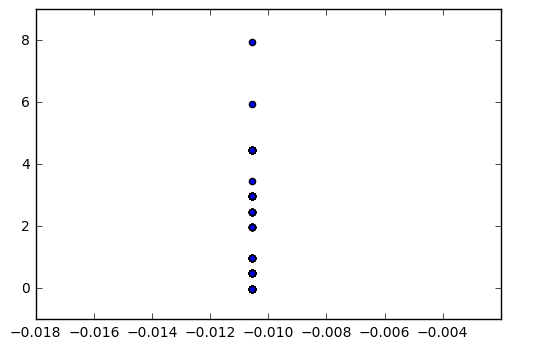

In [154]:
clustered_df = X_1[X_1['cluster'] == 0]
plt.scatter(clustered_df['root_shell'], clustered_df['num_root'],c='b')
plt.show()

In [155]:
y_1[X_1['cluster'] == 0].value_counts()

dos       391458
normal     97254
probe       4107
r2l         1120
u2r           26
Name: label, dtype: int64

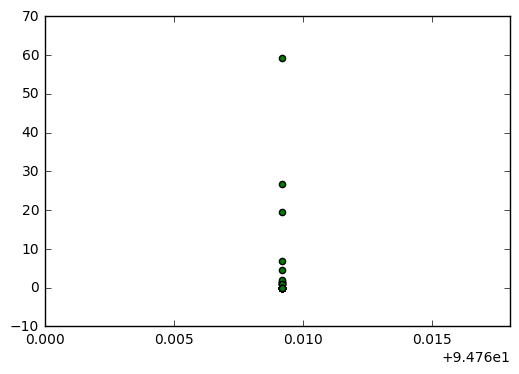

In [156]:
clustered_df = X_1[X_1['cluster'] == 1]
plt.scatter(clustered_df['root_shell'], clustered_df['num_root'],c='g')
plt.show()

In [158]:
y_1[X_1['cluster'] == 1].value_counts()

u2r       26
normal    19
r2l        6
Name: label, dtype: int64

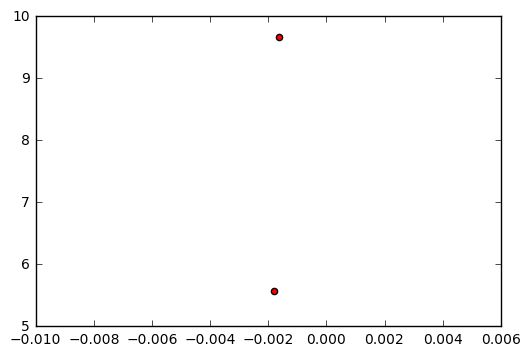

In [160]:
clustered_df = X_1[X_1['cluster'] == 2]
plt.scatter(clustered_df['src_bytes'], clustered_df['dst_bytes'],c='r')
plt.show()

In [164]:
y_1[X_1['cluster'] == 2].value_counts()

normal    2
Name: label, dtype: int64

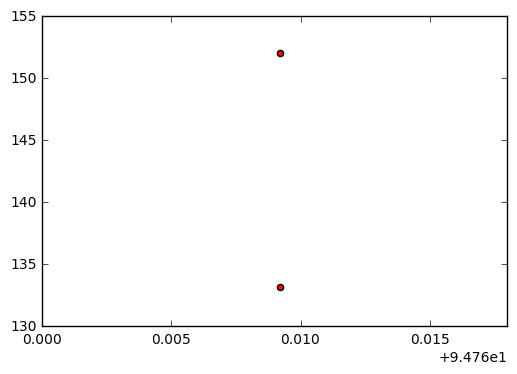

In [166]:
clustered_df = X_1[X_1['cluster'] == 3]
plt.scatter(clustered_df['root_shell'], clustered_df['num_root'],c='r')
plt.show()

In [167]:
y_1[X_1['cluster'] == 3].value_counts()

normal    2
Name: label, dtype: int64

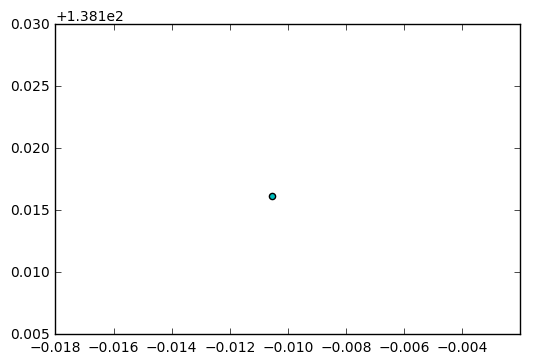

In [168]:
clustered_df = X_1[X_1['cluster'] == 4]
plt.scatter(clustered_df['root_shell'], clustered_df['num_root'],c='c')
plt.show()

In [169]:
y_1[X_1['cluster'] == 4].value_counts()

normal    1
Name: label, dtype: int64

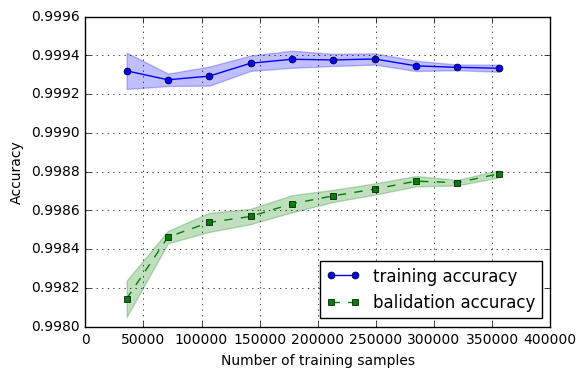

In [48]:
#分类器

from sklearn.ensemble import RandomForestClassifier
##建立模型
clf_1 = RandomForestClassifier()
#验证测试样本
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_1,test_size=0.2,random_state=0)
clf_1.fit(X_train,y_train)
preditions=clf_1.predict(X_test)
#学习曲线
import numpy as np
from sklearn.model_selection import learning_curve
train_sizes,train_scores,test_scores=learning_curve(estimator=clf_1,
                                X=X_train,y=y_train,
                                train_sizes=np.linspace(0.1,1,10),
                                 cv=10, n_jobs=1,random_state=0)
train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_std=np.std(train_scores,axis=1)
import matplotlib.pyplot as plt
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,
         label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,
         color='blue',alpha=0.25)
plt.plot(train_sizes,test_mean,color='green',linestyle='--',
         marker='s',markersize=5,
         label='balidation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,
         color='green',alpha=0.25)
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

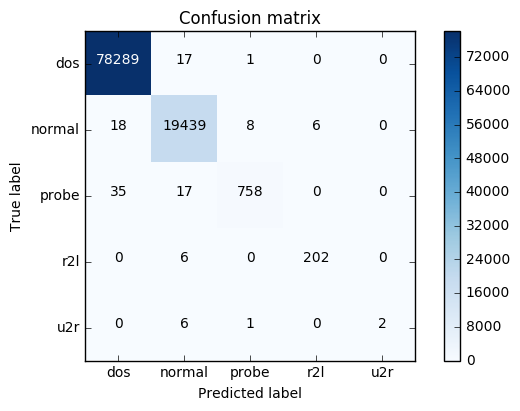

In [49]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#混淆矩阵
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,preditions)
class_names=['dos','normal','probe','r2l','u2r']
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

In [50]:
#分类报告
from sklearn.metrics import classification_report
class_names=['dos','normal','probe','r2l','u2r']
print(classification_report(y_test,preditions,target_names=class_names,digits=6))

             precision    recall  f1-score   support

        dos   0.999323  0.999770  0.999547     78307
     normal   0.997639  0.998357  0.997998     19471
      probe   0.986979  0.935802  0.960710       810
        r2l   0.971154  0.971154  0.971154       208
        u2r   1.000000  0.222222  0.363636         9

avg / total   0.998831  0.998836  0.998805     98805



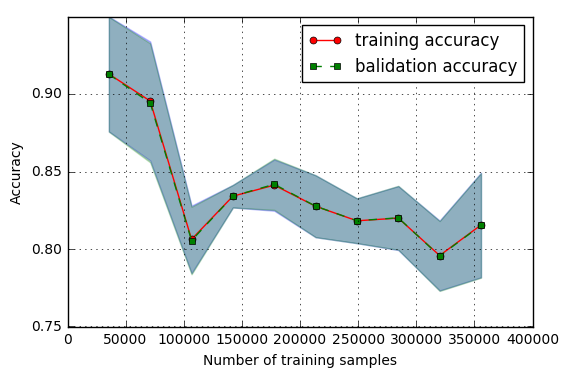

In [51]:
#分类器

from sklearn.naive_bayes import GaussianNB
##建立模型
clf_2 = GaussianNB()
#验证测试样本
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_1,test_size=0.2,random_state=0)
clf_2.fit(X_train,y_train)
preditions=clf_2.predict(X_test)

#学习曲线
import numpy as np
from sklearn.model_selection import learning_curve
train_sizes,train_scores,test_scores=learning_curve(estimator=clf_2,
                                X=X_train,y=y_train,
                                train_sizes=np.linspace(0.1,1,10),
                                 cv=10, n_jobs=1,random_state=0)
train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_std=np.std(train_scores,axis=1)
import matplotlib.pyplot as plt
plt.plot(train_sizes,train_mean,color='red',marker='o',markersize=5,
         label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,
         color='blue',alpha=0.25)
plt.plot(train_sizes,test_mean,color='green',linestyle='--',
         marker='s',markersize=5,
         label='balidation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,
         color='green',alpha=0.25)
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

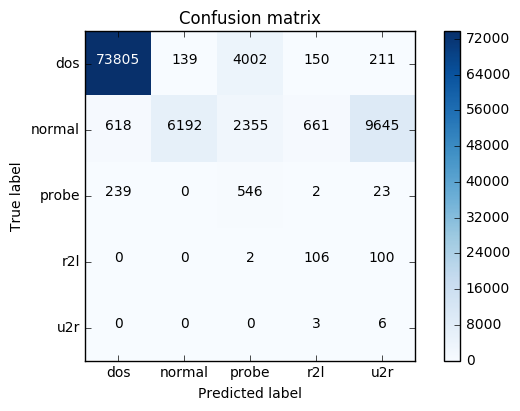

In [52]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#混淆矩阵
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,preditions)
class_names=['dos','normal','probe','r2l','u2r']
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

In [52]:
#分类报告
from sklearn.metrics import classification_report
class_names=['dos','normal','probe','r2l','u2r']
print(classification_report(y_test,preditions,target_names=class_names,digits=6))

             precision    recall  f1-score   support

        dos   0.988522  0.942508  0.964967     78307
     normal   0.978045  0.318011  0.479963     19471
      probe   0.079073  0.674074  0.141542       810
        r2l   0.114967  0.509615  0.187611       208
        u2r   0.000601  0.666667  0.001201         9

avg / total   0.977072  0.816305  0.860915     98805

